In [ ]:
import csv
import math as m
l1 = 50
l2 = 40
l3 = 20
with open('datarobot3b.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','tt3','Px','Py'])
  for tt1 in range(-180,180,2):
    for tt2 in range(-180,180,2):
      for tt3 in range(-180,180,2):
        tt1 = (tt1*m.pi)/180
        tt2 = (tt2*m.pi)/180
        tt3 = (tt3*m.pi)/180
        Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2) + l3*m.cos(tt1 + tt2 + tt3)
        Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2) + l3*m.sin(tt1 + tt2 + tt3)
        phi = tt1 + tt2 + tt3
        writer.writerow([tt1,tt2,tt3,Px,Py])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
data = pd.read_csv('datarobot3b.csv')
y = data.drop(data.columns[3:],axis = 1)
x = data.drop(data.columns[:3],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout #Dropout: gia tri dung xu li
model=Sequential()
model.add(Dense(20,activation='relu',input_shape=(2,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                60        
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 3)                 63        
                                                                 
Total params: 963
Trainable params: 963
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=1,verbose=1,validation_data = (x_test, y_test))

34172/34172 [==============================] - 82s 2ms/step - loss: 0.9203 - accuracy: 0.9380 - val_loss: 0.9225 - val_accuracy: 0.9304


In [ ]:
model.save('robot3bac.h5')

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

45563/45563 [==============================] - 64s 1ms/step - loss: 0.9225 - accuracy: 0.9304


[0.9225295186042786, 0.930372416973114]

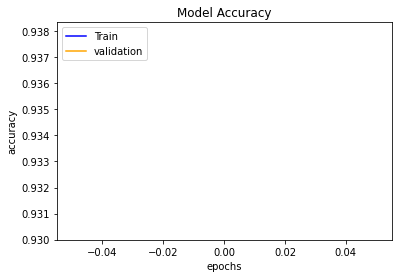

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'], loc = 'upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_robot3b = load_model('robot3bac.h5')